In [1]:
# funciones
import matplotlib.pyplot as plt
import numpy as np
from fun_gilles import *

def concentration_time(times, abundances, V, species):
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
    plt.figure()
    plt.grid(True, linestyle='--', alpha=0.3)
    for i in range(len(species)):
        plt.plot(times, abundances[:, i]/V, label=species[i], color=colors[i], alpha=0.9)
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.show()

def volume_time(times, V):
    plt.figure()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.plot(times, V, color= plt.cm.coolwarm(0))
    plt.xlabel("Time")
    plt.ylabel("Volume")
    plt.show()

def abundances_times(times, abundances, species):
    plt.figure()
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
    
    for i in range(len(species)):
        plt.plot(times, abundances[:, i], label=species[i], color=colors[i], alpha=0.9)
    
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("Time")
    plt.ylabel("Abundances")
    plt.legend()
    plt.title(f"Time evolution: {np.shape(times)[0]-1} iterations, k= {k}")
    plt.show()

# Pruebas con el sistema XYC

In [2]:
# Initialization:
file = "reactions_XYC_food.txt" # M reactions
method = "Gillespie" # Gillespie or Deterministic

# Reaction constants:
k = [0.1]*2+[1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 100

# condiciones iniciales
initial_food = [200,0,0,0,0] # initial molecules number

# obtener reacciones y especies:
reactions = read_file(file)
species = obtain_species(reactions)
n_iterations= 100000 # In the deterministic mode n_iterations refers to the t_end


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

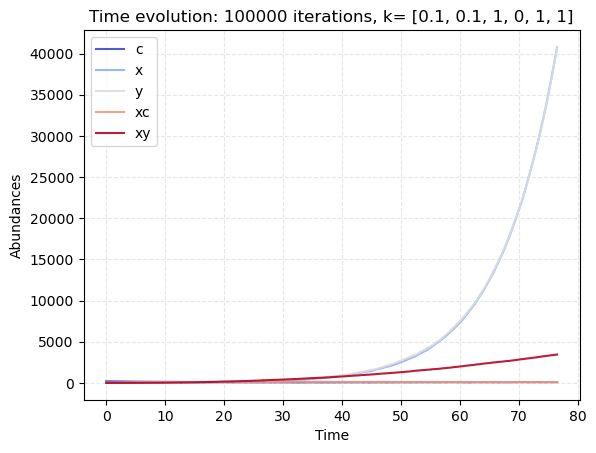

In [3]:
abundances_times(times, abundances, species)

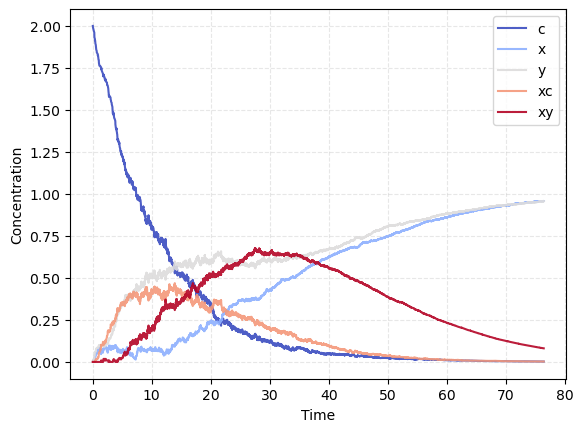

In [4]:
concentration_time(times, abundances, V, species)

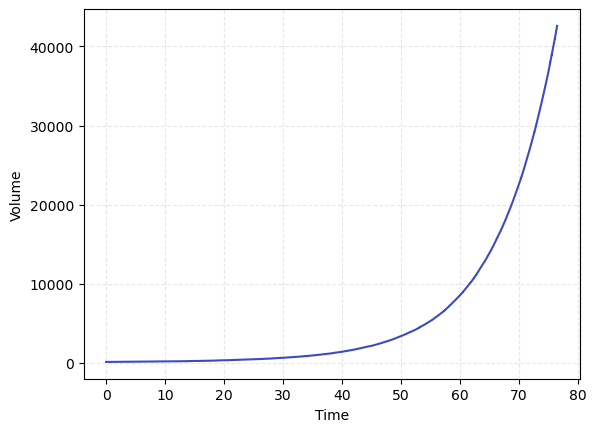

In [5]:
volume_time(times, V)

# Pruebas con el sistema C

$\longrightarrow C_1$

$C_1 + C_2 \longleftrightarrow C_3$

$C_1 + C_3 \longleftrightarrow C_4$

$2C_2 \longleftrightarrow C_4$


## Ejemplo 1

In [6]:
# Initialization:
file = "reactions_C.txt" # M reactions
method = "Gillespie" # Gillespie or Deterministic

# Reaction constants:
k = [1e-2]+[1]*6 # len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

# obtener reacciones y especies:
reactions = read_file(file)
species = obtain_species(reactions)
n_iterations= 100000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

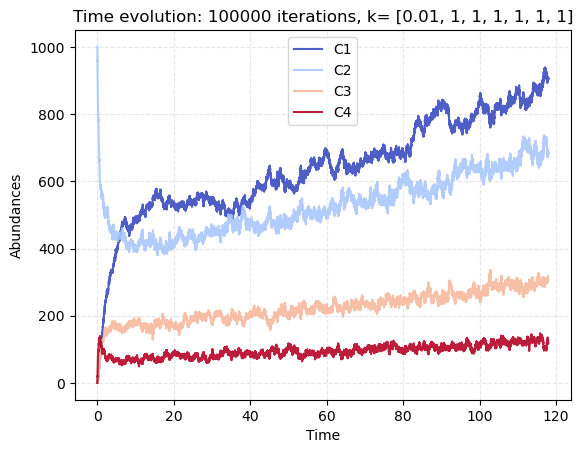

In [7]:
abundances_times(times, abundances, species)

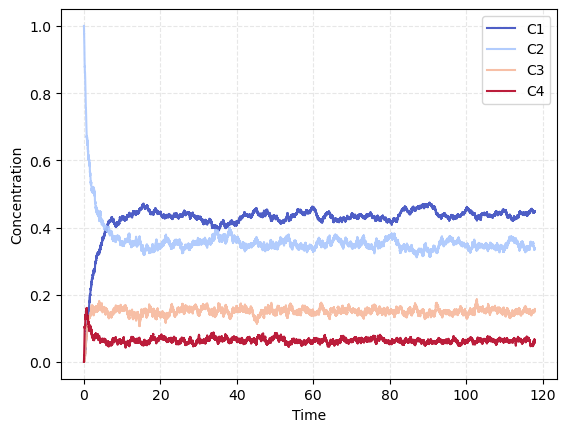

In [8]:
concentration_time(times, abundances, V, species)

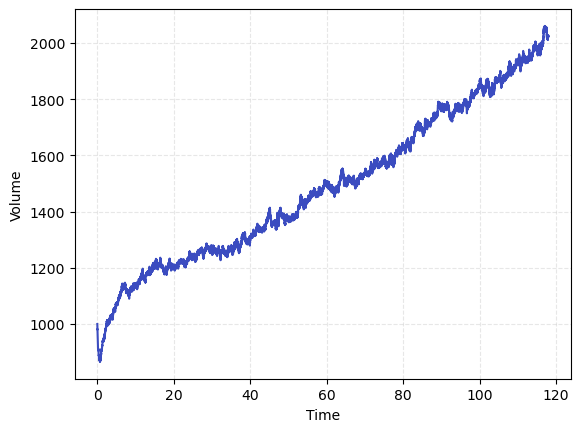

In [9]:
volume_time(times, V)

### Reacción 2 C2 --> C4 eliminada
Es raro que el volumen caiga al principio, pero supongo que es porque hay una caída de la abundancia total (el volumen se calcula para mantener la relacion abundancia/volumen constante). Esta caída se debe a la reacción c2+c2 --> c4. Para comprobarlo ponemos esa reacción a 0 y volvemos a representar el volumen, donde esperaríamos no tener esa caída

In [10]:
file = "reactions_C.txt" # M reactions
method = "Gillespie" # Gillespie or Deterministic

# Reaction constants:
k = [1e-2]+[1]*5 + [0] # len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

# obtener reacciones y especies:
reactions = read_file(file)
species = obtain_species(reactions)
n_iterations= 50000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

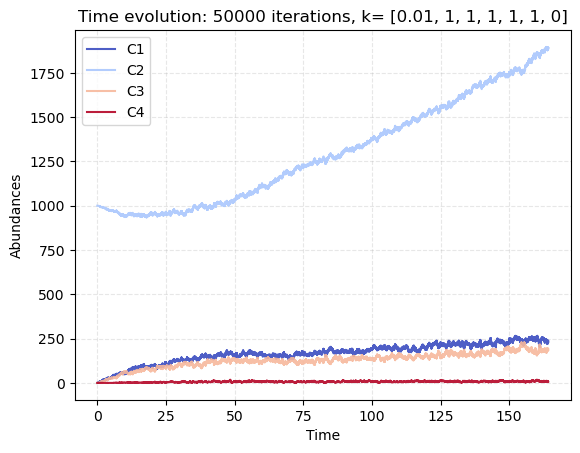

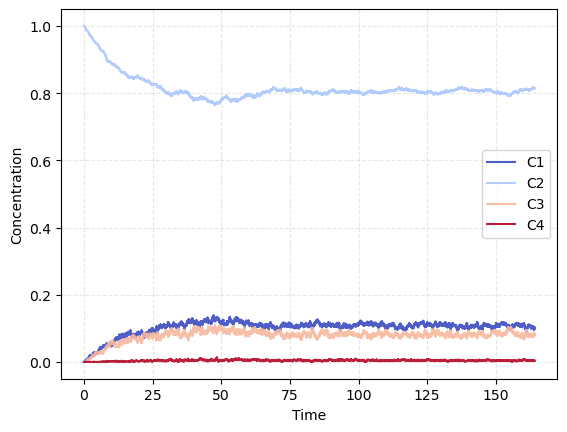

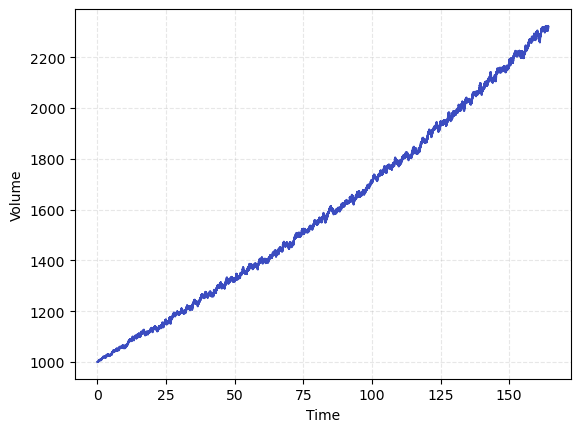

In [11]:
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

## Ejemplo 2

Igual que el anterior, pero voy a poner a 0 todas las reacciones inversas menos la última

In [21]:
# Reaction constants:
k = [1e-2]+[1]*6# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,500,500] # initial molecules number

n_iterations= 100000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

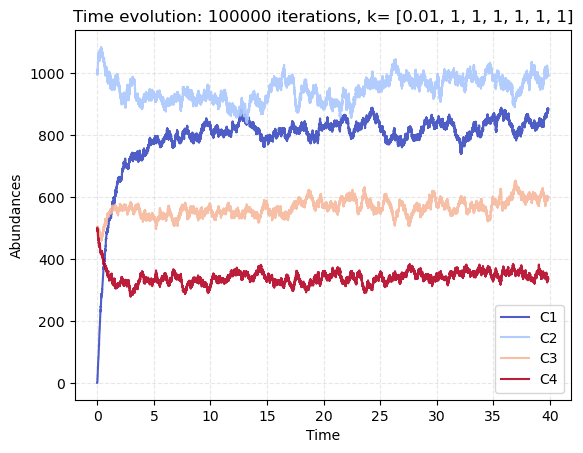

In [22]:
abundances_times(times, abundances, species)

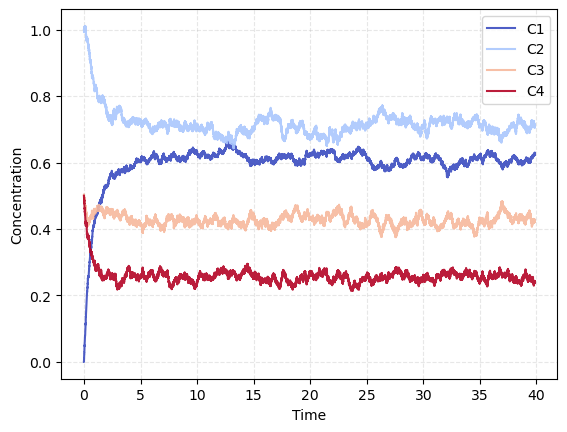

In [23]:
concentration_time(times, abundances, V, species)

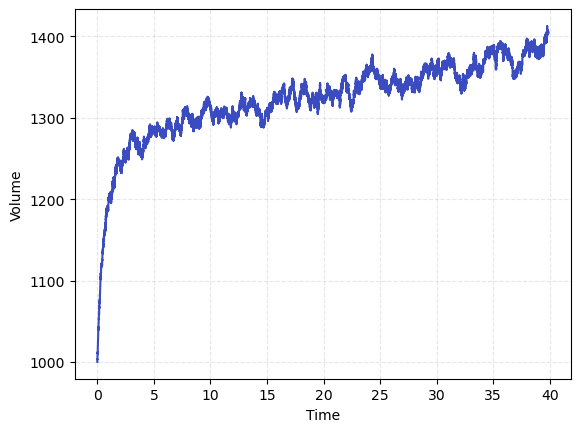

In [24]:
volume_time(times, V)

## Ejemplo 3

In [27]:
# Reaction constants:
k = [1e-5]+[1]*6# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

# obtener reacciones y especies:
n_iterations= 80000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

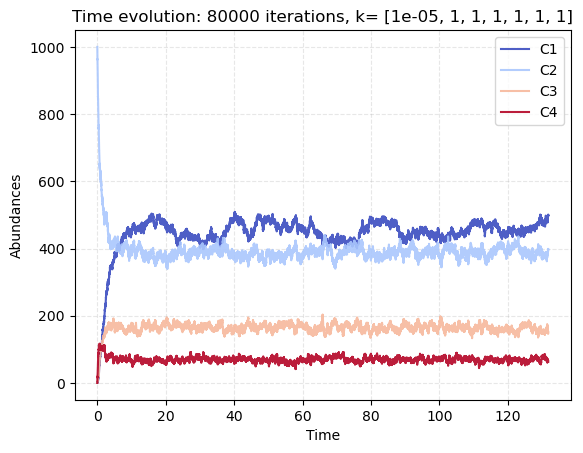

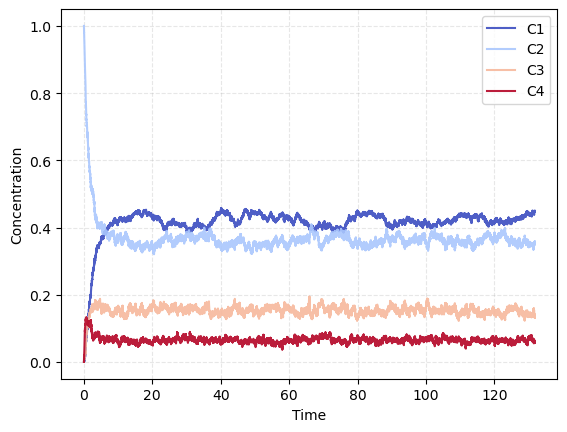

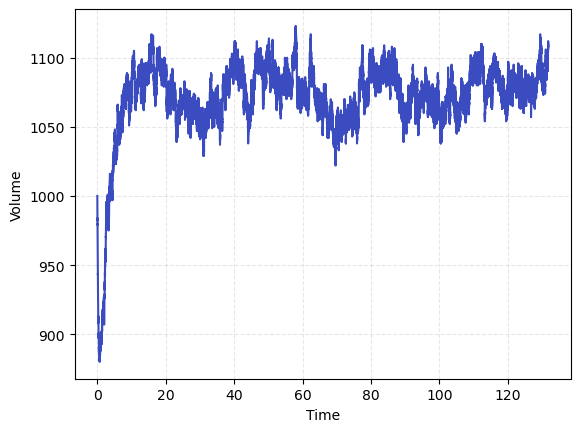

In [28]:
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)